# Employee Exit Surveys #

## Introduction 

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will try to answer this by combining the datas of the two datasets that we have. 

Here are some more information about the two dataset: 

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading our datsets

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey["Position"].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Deputy Principal                                             4
Business Service Manager                                     4
Name: Position, dtype: int64

## Identify Missing Values and Drop Unneccessary Columns

Dete_survey provides us with pieces of information about 822 workers, with 56 columns. The dataframe is giving us factual information about the end of the contract of those workers.We can already see that we have some missing values that we will have to deal with (marked as 'Not Stated' instead of NaN)

On the other hand tafe_survey goes much more into the details of the resignation, with 71 columns in order to describe the event. What could lead to that situation, with more accurate and personal questions. We have even more missing values on that dataset.

Both datasets contains columns that we do not really need to complete our analysis. Furthermore the two dataframe share the same columns with different names. 

We can also already see a few columns that may help us indicates if an employee was dissatisfied.

First let's deal with the "Not Stated" values that need to be modified.

In [8]:
dete_survey = pd.read_csv("dete_survey.csv" , na_values = "Not Stated")


Now let's drop the columns we don't need : from columns 28 to 49 for "dete_survey" and 17 to 66 for "tafe_survey".

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis= 1)

In [10]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis= 1)

We decided to drop the columns of dete_survey that were not giving us more information than what we have on tafe_survey.

Regarding tafe_survey we dropped all the columns that refer to the questions as there are already some columns that sum up the contribution tof each factor to the resignation, so we do not need the detailled questions that follows. 

## Rename Columns

Now let's rename the columns of each dataframe so that we can merge them later.


| dete_survey      | tafe_survey |
| ----------- | ----------- |
| ID      | Record ID       |
| SeparationType   | Reason for ceasing        |
| Cease Date      | CESSATION YEAR       |
| DETE Start Date   |         |
|       | LengthofServiceOverall. Overall Length of Service at Institute (in years)       |
| Age   | CurrentAge. Current Age        |
| Gender      | Gender. What is your Gender?       |


In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ","_").str.strip()


In [12]:
new_columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = new_columns)

## Filter the Data

We can see that there are numerous reasons that could explain the end of a contract, however we are only interested in the ones that resigned. We still want to understand why people are resigning (or going to another employers) so we will drop the rows about people "naturally" quitting, such as Retirement or Health issues or Contract Expired.
 
 Then we gather all three types of resignations of the dete dataset under "Resignations"

In [13]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
dete_resignations = dete_survey_updated[np.logical_or.reduce([dete_survey_updated["separationtype"] == "Resignation-Other reasons", dete_survey_updated["separationtype"] == "Resignation-Other employer" , dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate"])]
tafe_resignations = tafe_survey_updated[np.logical_or.reduce([tafe_survey_updated["separationtype"] == "Resignation"])]

In [16]:
dete_resignations ['separationtype'] = dete_resignations ['separationtype'].str.split('-').str[0]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Verify the Data

Let's check if the remaining data seem reasonnable, that there are not obvious irregularities. 

For example when it comes to the starting and end date of work we can check a few basic things. Let's start with the dates in dete_resignations : 

In [17]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([1-2][0-9]{3})").astype("float")



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
dete_resignations["cease_date"].value_counts(ascending= True)

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [20]:
tafe_resignations["cease_date"].value_counts(ascending= True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [21]:
dete_resignations["dete_start_date"].value_counts(ascending= True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

(2005, 2015)

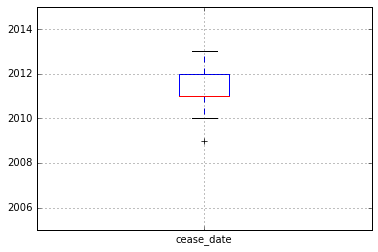

In [22]:
fig, axs = plt.subplots()
ax1 = pd.DataFrame.boxplot(tafe_resignations, column = ["cease_date"])
ax1.set_ylim(2005,2015)

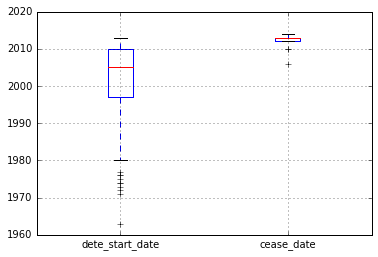

In [23]:
pd.DataFrame.boxplot(dete_resignations, column = ["dete_start_date","cease_date"])


It does not seem like we have any outliers in our dates.However the dates in our two dataframes are not really corresponding (no cease date for 2009 in dete_resignations but 2 for tafe_resignations etc...). However we are not analyzing the year but the reasons so we will leave it as it is.

## Create a New Column

We want to be able to know how much time am employee was working before he resign. Let's create a new column called "institute_service" that will let us know how many years an employee worked for his company/institution. We can substract the dete_start_date from the cease_date to obtain the result.

In [24]:
dete_resignations["institute_service"] = dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
dete_resignations["institute_service"].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Let's see how we can identify dissatisfied employees. 

We noticed a few columns that are linked with the dissatisfaction of employees :

tafe_resignations:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dete_resignations:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

We will consider that an employee was dissatisfied if any of those factors cause him to resign.
Then we will add this information to a new line.

Let's start with the tafe dataset

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def update_vals(i):
    if i == "-":
        return False
    elif pd.isnull(i):
        return np.nan
    else:
        return True

In [28]:
tafe_resignations["dissatisfied"] = tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(update_vals).any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
tafe_resignations_up["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Let's do the same thing with our dete_resignations dataframe. in this case we do not need to use our function update_vals as the columns are already filled with 'True' and 'False'. 


In [30]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

We know have a column that indicates if a person resigned due to dissatisfaction

## Combining the Data

We are now ready to merge our two datasets. We first create a new column that will indicate from which dataframe each row comes from.

In [32]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [33]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

We decide to drop all the columns that have less than 500 non null values ( on a total of 651, so every row with more than 23% of null values)

In [34]:
combined_up = combined.dropna(axis = 1 ,thresh = 500)

## Clean the Service Column

Before analyzing the data we need to clean our institute_service column to be able to group our data per years of work.

In [35]:
combined_up["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We can see that we have many different options, let's gather them under 4 categories : 

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

We need to extract the number of years they worked inside this column :

In [36]:
combined_up["institute_service"] = combined_up["institute_service"].astype("str")


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
combined_up["institute_service"] = combined_up["institute_service"].str.extract(r'(\d+)') 
combined_up["institute_service"]  = combined_up["institute_service"].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

Now we use those numbers to assign each row to one of our category :

In [38]:
combined_up["institute_service"].value_counts(dropna = False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [39]:
def experience(i):
    if i < 3:
        return "New"
    elif 3 <= i <= 6:
        return "Experienced"
    elif 7 <= i <= 10:
        return "Established"
    elif pd.isnull(i):
        return np.nan 
    else:
        return "Veteran"

In [40]:
combined_up["service_cat"] = combined_up["institute_service"].apply(experience)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
combined_up["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Introduction to Data Analysis 

We can finally start answering our initials questions after cleaning our database

Let's aggregate our data on our "dissatisfied" column to analyze each group : the satisfied workers and the dissatisfied ones!

In [48]:
combined_up["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
combined_up["dissatisfied"] = combined_up["dissatisfied"].fillna(combined_up["dissatisfied"].mode().iloc[0])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
analysis = combined_up.pivot_table(index='service_cat', values='dissatisfied')
analysis

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


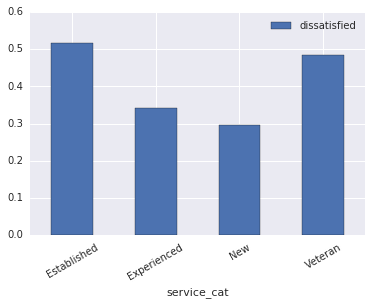

In [74]:
# Plot the results

analysis.plot(kind='bar', rot=30)


From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.